In [1]:
from geopy.geocoders import Nominatim
from streamlit_folium import folium_static
import folium
import pandas as pd

In [8]:
#df = pd.read_csv('https://www.berlin.de/landesdenkmalamt/_assets/pdf-und-zip/denkmale/liste-karte-datenbank/denkmalliste_berlin.csv')

In [267]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Dernburgstrasse 2')

In [268]:
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 52.5031532, Longitude = 13.2900053


In [269]:
#import data
df = pd.read_csv('data/denkmalliste_berlin_092020.csv')
df.shape

(12222, 12)

In [270]:
#drop not needed columns
df = df.drop(['Ensemble_Info', 'Zugehörigkeit', 'Adresse2', 'Architekt und weitere Informationen'], axis=1)

In [271]:
#remove null
df = df[df['Adresse'].notna()]
df.shape

(12003, 8)

In [272]:
#data cleaning and creating a new column
tmp_1 = df["Adresse"].str.split("/", n = 1, expand = True)
tmp_2 = tmp_1[0].str.split(",", n = 1, expand = True)
df['address'] = tmp_2[0]
df['address']

0                 Badenallee 29-30
1                    Badenallee 29
2              Binger Straße 10-16
3                Binger Straße 16 
4             Binger Straße 18-20 
                   ...            
12217          Schönblicker Straße
12218    Schönefelder Chaussee 100
12219            Späthstraße 77-81
12220       Wendenschloßstraße 254
12221         Schloßinsel Köpenick
Name: address, Length: 12003, dtype: object

In [273]:
df = df.sample(n=100)
df.shape

(100, 9)

In [275]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls (this min delay can be a problem)
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df['location'] = df['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

2021-06-21 20:49:09.436 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Torstra%C3%9Fe+62&format=json&limit=1
2021-06-21 20:49:31.659 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Ahornallee+24&format=json&limit=1
2021-06-21 20:49:39.322 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Drakestra%C3%9Fe+10&format=json&limit=1
202

In [276]:
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]

In [281]:
df.shape

(99, 14)

In [282]:
#df.to_csv('monuments.csv')

In [283]:
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 

In [284]:
#m

In [285]:
df_monuments = df
for i,r in df_monuments.iterrows():
    location = [r["latitude"], r["longitude"]]
    folium.Marker(location=location, popup = r['ID'], tooltip=r['ID'], 
                 icon=folium.Icon( icon='eject')).add_to(m)

In [1]:
from geopy.geocoders import Nominatim
import folium
from streamlit_folium import folium_static
from folium.plugins import MarkerCluster
from geopy.extra.rate_limiter import RateLimiter
import pandas as pd
from folium.plugins import FastMarkerCluster
import streamlit as st

In [3]:
#import data
df = pd.read_csv('data/denkmalliste_berlin_092020.csv')

#Data Cleaning
df = pd.read_csv('data/denkmalliste_berlin_092020.csv')
df = df[df['Adresse'].notna()]

#creating a new column
tmp_1 = df["Adresse"].str.split("/", n = 1, expand = True)
tmp_2 = tmp_1[0].str.split(",", n = 1, expand = True)
df['address'] = tmp_2[0]

In [4]:
df = df.sample(n=100)

In [5]:
#converting address ro coordinates
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls (this min delay can be a problem)
geocode = RateLimiter(locator.geocode, min_delay_seconds=3)
# 2- - create location column
df['location'] = df['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

#make sure there is no null value for latitude and longitute
df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]

2021-07-02 18:15:21.937 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Ferdinandstra%C3%9Fe+22&format=json&limit=1
2021-07-02 18:15:26.338 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Markgrafenstra%C3%9Fe+65&format=json&limit=1
2021-07-02 18:15:30.205 WARNING urllib3.connectionpool: Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)")': /search?q=Greifswalder+Stra%C3%9Fe+9

In [7]:
df.head(2)

Unnamed: 0       ID         Ortsteil               Bezirk           Typ  \
9370        9370  9075766  STE-ZEH/ZEHLD-G  Steglitz-Zehlendorf  Gesamtanlage   
8679        8679  9065674  STE-ZEH/LIFEL-E  Steglitz-Zehlendorf      Ensemble   

            Bezeichnung         Ensemble_Info Zugehörigkeit  \
9370  Kleinhaussiedlung                   NaN           NaN   
8679          Mietshaus  Ensemble-Bestandteil           NaN   

                                   Adresse             Adresse2  \
9370             Im Schönower Park 1A, 2-7   (STE-ZEH/ZEHLD-G)    
8679  Asternplatz 2 / Unter den Eichen 114                  NaN   

     Architekt und weitere Informationen     Jahr               address  \
9370     Rudolf Fisch und Gustav Kemper   1921-22  Im Schönower Park 1A   
8679                        A. Petersen   1910-11        Asternplatz 2    

                                               location  \
9370  (1A, Im Schönower Park, Zehlendorf, Steglitz-Z...   
8679  (2, Asternplatz, Lichterfelde, Steglitz-Zehlen...   

                                       point   latitude  longitude  altitude  
9370  (52.42881405, 13.262538455591496, 0.0)  52.428814  13.262538       0.0  
8679           (52.4492849, 13.3047425, 0.0)  52.449285  13.304742       0.0

In [19]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(['location', 'point', 'altitude'], axis=1)

In [20]:
from pymongo import MongoClient
client = MongoClient()
db = client['berlin']

In [21]:
df.head(2)

ID         Ortsteil               Bezirk           Typ  \
9370  9075766  STE-ZEH/ZEHLD-G  Steglitz-Zehlendorf  Gesamtanlage   
8679  9065674  STE-ZEH/LIFEL-E  Steglitz-Zehlendorf      Ensemble   

            Bezeichnung         Ensemble_Info Zugehörigkeit  \
9370  Kleinhaussiedlung                   NaN           NaN   
8679          Mietshaus  Ensemble-Bestandteil           NaN   

                                   Adresse             Adresse2  \
9370             Im Schönower Park 1A, 2-7   (STE-ZEH/ZEHLD-G)    
8679  Asternplatz 2 / Unter den Eichen 114                  NaN   

     Architekt und weitere Informationen     Jahr               address  \
9370     Rudolf Fisch und Gustav Kemper   1921-22  Im Schönower Park 1A   
8679                        A. Petersen   1910-11        Asternplatz 2    

       latitude  longitude  
9370  52.428814  13.262538  
8679  52.449285  13.304742

In [22]:
monuments = df.T.to_dict().values()
monuments

dict_values([{'ID': 9075766, 'Ortsteil': 'STE-ZEH/ZEHLD-G', 'Bezirk': 'Steglitz-Zehlendorf', 'Typ': 'Gesamtanlage', 'Bezeichnung': 'Kleinhaussiedlung', 'Ensemble_Info': nan, 'Zugehörigkeit': nan, 'Adresse': 'Im Schönower Park 1A, 2-7', 'Adresse2': ' (STE-ZEH/ZEHLD-G) ', 'Architekt und weitere Informationen': 'Rudolf Fisch und Gustav Kemper ', 'Jahr': '1921-22', 'address': 'Im Schönower Park 1A', 'latitude': 52.42881405, 'longitude': 13.262538455591496}, {'ID': 9065674, 'Ortsteil': 'STE-ZEH/LIFEL-E', 'Bezirk': 'Steglitz-Zehlendorf', 'Typ': 'Ensemble', 'Bezeichnung': 'Mietshaus', 'Ensemble_Info': 'Ensemble-Bestandteil', 'Zugehörigkeit': nan, 'Adresse': 'Asternplatz 2 / Unter den Eichen 114', 'Adresse2': nan, 'Architekt und weitere Informationen': 'A. Petersen ', 'Jahr': '1910-11', 'address': 'Asternplatz 2 ', 'latitude': 52.4492849, 'longitude': 13.3047425}, {'ID': 9065231, 'Ortsteil': 'PAN/PRENZ-E', 'Bezirk': 'Pankow', 'Typ': 'Ensemble', 'Bezeichnung': 'Mietshaus einschließlich Durchfah

In [23]:
db.monuments.insert_many(monuments)   

**Starting the map**

In [24]:
import pymongo
import streamlit as st
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from streamlit_folium import folium_static

In [26]:
# Initialize connection.
client = pymongo.MongoClient(**st.secrets["mongo"])

In [31]:
db = client.berlin
items = db.memorials.find()
items = list(items)  

In [33]:
#items

In [35]:
# Print results.
#for item in items:
    #print(item['name'])

In [39]:
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 

In [42]:
for item in items:
    location = [item["lat"], item["lon"]]
    folium.Marker(location=location, popup = item['name'], tooltip=item['name']).add_to(m)

In [44]:
m

In [48]:
#pip install geopandas

In [39]:
import folium
from streamlit_folium import folium_static
import requests
import json
import geojson
import geopandas as gpd
import streamlit as st

In [40]:
#create Berlin Map
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 


#setting filters
cb0 = st.sidebar.checkbox("Reinickendorf")
cb1 = st.sidebar.checkbox("Charlottenburg-Wilmersdorf")
cb2 = st.sidebar.checkbox("Treptow-Köpenick")
cb3 = st.sidebar.checkbox("Pankow")
cb4 = st.sidebar.checkbox("Neukölln")
cb5 = st.sidebar.checkbox("Lichtenberg")
cb6 = st.sidebar.checkbox("Marzahn-Hellersdorf")
cb7 = st.sidebar.checkbox("Spandau")
cb8 = st.sidebar.checkbox("Steglitz-Zehlendorf")
cb9 = st.sidebar.checkbox("Mitte")
cb10 = st.sidebar.checkbox("Friedrichshain-Kreuzberg")
cb11= st.sidebar.checkbox("Tempelhof-Schöneberg")

cb_dist=[cb0, cb1, cb2, cb3, cb4, cb5, cb6, cb7, cb8, cb9, cb10, cb11]

2021-07-03 10:43:03.581 WARNING root: 
  command:

    streamlit run C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [52]:
#create Berlin Map
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 


In [32]:
m

NameError: name 'm' is not defined

gml_id               Gemeinde_name  \
0    s_wfs_alkis_bezirk.F176__1               Reinickendorf   
1    s_wfs_alkis_bezirk.F176__2  Charlottenburg-Wilmersdorf   
2    s_wfs_alkis_bezirk.F176__3            Treptow-Köpenick   
3    s_wfs_alkis_bezirk.F176__4                      Pankow   
4    s_wfs_alkis_bezirk.F176__5                    Neukölln   
5    s_wfs_alkis_bezirk.F176__6                 Lichtenberg   
6    s_wfs_alkis_bezirk.F176__7         Marzahn-Hellersdorf   
7    s_wfs_alkis_bezirk.F176__8                     Spandau   
8    s_wfs_alkis_bezirk.F176__9         Steglitz-Zehlendorf   
9   s_wfs_alkis_bezirk.F176__10                       Mitte   
10  s_wfs_alkis_bezirk.F176__11    Friedrichshain-Kreuzberg   
11  s_wfs_alkis_bezirk.F176__12        Tempelhof-Schöneberg   

   Gemeinde_schluessel Land_name Land_schluessel Schluessel_gesamt  \
0                  012    Berlin              11          11000012   
1                  004    Berlin              11          11000004   
2                  009    Berlin              11          11000009   
3                  003    Berlin              11          11000003   
4                  008    Berlin              11          11000008   
5                  011    Berlin              11          11000011   
6                  010    Berlin              11          11000010   
7                  005    Berlin              11          11000005   
8                  006    Berlin              11          11000006   
9                  001    Berlin              11          11000001   
10                 002    Berlin              11          11000002   
11                 007    Berlin              11          11000007   

                                             geometry  
0   MULTIPOLYGON (((13.32074 52.62660, 13.32045 52...  
1   MULTIPOLYGON (((13.32111 52.52446, 13.32103 52...  
2   MULTIPOLYGON (((13.57925 52.39083, 13.57958 52...  
3   MULTIPOLYGON (((13.50481 52.61960, 13.50467 52...  
4   MULTIPOLYGON (((13.45832 52.48569, 13.45823 52...  
5   MULTIPOLYGON (((13.52316 52.47424, 13.52367 52...  
6   MULTIPOLYGON (((13.61317 52.47213, 13.61329 52...  
7   MULTIPOLYGON (((13.23119 52.56124, 13.23092 52...  
8   MULTIPOLYGON (((13.31952 52.46699, 13.31910 52...  
9   MULTIPOLYGON (((13.37721 52.56091, 13.37715 52...  
10  MULTIPOLYGON (((13.45529 52.52127, 13.45542 52...  
11  MULTIPOLYGON (((13.38759 52.38677, 13.38761 52...

**Monuments Select Data**

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv('data/denkmalliste_berlin_092020.csv')
df.head(1)

Unnamed: 0       ID         Ortsteil                      Bezirk       Typ  \
0           0  9020353  CHA-WIL/WESTE-E  Charlottenburg-Wilmersdorf  Ensemble   

  Bezeichnung    Ensemble_Info                    Zugehörigkeit  \
0  Wohnhäuser  ganzes Ensemble  Baudenkmal siehe: Badenallee 30   

            Adresse Adresse2 Architekt und weitere Informationen Jahr  
0  Badenallee 29-30      NaN                                 NaN  NaN

In [108]:
df_charlotengburg = df[df['Bezirk'] == 'Charlottenburg-Wilmersdorf'].sample(n=1)
df_reinickendorf = df[df['Bezirk'] == 'Reinickendorf'].sample(n=1)
df_treptow_kopenick = df[df['Bezirk'] == 'Treptow-Köpenick'].sample(n=1)
df_pankow = df[df['Bezirk'] == 'Pankow'].sample(n=1)
df_neukölln = df[df['Bezirk'] == 'Neukölln'].sample(n=1)
df_lichtenberg = df[df['Bezirk'] == 'Lichtenberg'].sample(n=1)
df_marzahn_hellersdorf = df[df['Bezirk'] == 'Marzahn-Hellersdorf'].sample(n=1)
df_spandau = df[df['Bezirk'] == 'Spandau'].sample(n=1)
df_steglitz_zehlendorf = df[df['Bezirk'] == 'Steglitz-Zehlendorf'].sample(n=1)
df_mitte= df[df['Bezirk'] == 'Mitte'].sample(n=1)
df_friedrichshain_kreuzberg= df[df['Bezirk'] == 'Friedrichshain-Kreuzberg'].sample(n=1)
df_tempelhof_schöneberg = df[df['Bezirk'] == 'Tempelhof-Schöneberg'].sample(n=1)

In [109]:
df_monuments_combined = pd.concat([df_charlotengburg, df_reinickendorf, df_treptow_kopenick, df_pankow, df_neukölln, df_lichtenberg, 
                                     df_marzahn_hellersdorf, df_spandau, df_steglitz_zehlendorf, df_mitte, df_friedrichshain_kreuzberg, df_tempelhof_schöneberg], ignore_index=True)


In [110]:
#Data Cleaning
df_monuments_combined = df_monuments_combined[df_monuments_combined['Adresse'].notna()]

#creating a new column
tmp_1 = df_monuments_combined["Adresse"].str.split("/", n = 1, expand = True)
tmp_2 = tmp_1[0].str.split(",", n = 1, expand = True)
tmp_2 =  tmp_2.astype(str) + ', Berlin, Germany'

In [111]:
tmp_2[0]

0             Taubertstraße 6, Berlin, Germany
1         Hausotterstraße 101, Berlin, Germany
2                 Dorfplatz 4, Berlin, Germany
3           Breite Straße 16A, Berlin, Germany
4           Richardplatz 3A-F, Berlin, Germany
5     Wildensteiner Straße 20, Berlin, Germany
7      Gartenfelder Straße 14, Berlin, Germany
8             Auf dem Grat 35, Berlin, Germany
9             Glinkastraße 21, Berlin, Germany
10       Landsberger Allee 49, Berlin, Germany
11       Winterfeldtstraße 22, Berlin, Germany
Name: 0, dtype: object

In [112]:
df_monuments_combined['address'] = tmp_2[0]

In [113]:
df_monuments_combined = pd.concat([df_charlotengburg, df_reinickendorf, df_treptow_kopenick, df_pankow, df_neukölln, df_lichtenberg, 
                                     df_marzahn_hellersdorf, df_spandau, df_steglitz_zehlendorf, df_mitte, df_friedrichshain_kreuzberg, df_tempelhof_schöneberg], ignore_index=True)


from geopy.extra.rate_limiter import RateLimiter


#Data Cleaning
df_monuments_combined = df_monuments_combined[df_monuments_combined['Adresse'].notna()]

#creating a new column
tmp_1 = df_monuments_combined["Adresse"].str.split("/", n = 1, expand = True)
tmp_2 = tmp_1[0].str.split(",", n = 1, expand = True)
df_monuments_combined['address'] = tmp_2[0]


#converting address ro coordinates
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls (this min delay can be a problem)
geocode = RateLimiter(locator.geocode, min_delay_seconds=3)
# 2- - create location column
df_monuments_combined['location'] = df_monuments_combined['address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_monuments_combined['point'] = df_monuments_combined['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_monuments_combined[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_monuments_combined['point'].tolist(), index=df_monuments_combined.index)

#make sure there is no null value for latitude and longitute
df_monuments_combined = df_monuments_combined[df_monuments_combined['latitude'].notna()]
df_monuments_combined = df_monuments_combined[df_monuments_combined['longitude'].notna()]

#delete uneccessary columns
df_monuments_combined = df_monuments_combined.loc[:, ~df_monuments_combined.columns.str.contains('^Unnamed')]
df_monuments_combined = df_monuments_combined.drop(['location', 'point', 'altitude'], axis=1)


In [114]:
df_monuments_combined.to_csv('gess')

In [116]:
#create Berlin Map
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 
df_monuments = df_monuments_combined
for i,r in df_monuments.iterrows():
    location = [r["latitude"], r["longitude"]]
    properties=r
    html_popup=folium.Html(
        '''<b>Type</b><br>
        Description<br>
        '''
        .format(
            r['Typ'],
            r['Bezeichnung']
            ), 
        script=True)
    
    folium.Marker(location=location, popup = folium.Popup(html_popup, max_width=450), tooltip=r['ID'], 
                 icon=folium.Icon( icon='eject')).add_to(m)

In [117]:
m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 

In [128]:
for i in range(0,len(df_monuments)):
    html=f"""
    
        <h5> {df_monuments.iloc[i]['Typ']}</h5>
        <img src="data/charlottenburg.jpg" alt="Charlotengurg">
        <p>There are over </p>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[df_monuments.iloc[i]['latitude'], df_monuments.iloc[i]['longitude']],
        popup=popup,
        icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="50" cy="50" r="40" fill="#69b3a2" opacity=".4"/>
                <rect x="35", y="35" width="30" height="30", fill="red", opacity=".3" 
            </svg></div>""")
    ).add_to(m)

In [129]:
from folium import IFrame
import base64
widthresolution = 20
heightresolution = 20
Filename ='charlottenburg.jpg'
encoded = base64.b64encode(open(Filename, 'rb').read())
html='<img src="data:image/jpg;base64,{}">'.format #replace 《》with <>
resolution, width, height = 75, 50, 25
iframe = IFrame(html(encoded.decode()), width=(widthresolution)+20, height=(heightresolution)+20)
popup = folium.Popup(iframe, max_width=1000)
icon = folium.Icon(color="red", icon="ok")
marker = folium.Marker(location=[37.426, -122.085], popup=popup, icon=icon)
marker.add_to(m)

**New ideas**

In [70]:
import ipywidgets
import folium
from folium import plugins

In [71]:
# widgets
group1 = ipywidgets.Checkbox(description='group1')
group2 = ipywidgets.Checkbox(description='group2')
group3 = ipywidgets.Checkbox(description='group3')

In [136]:
import pandas
import os
import folium
from folium import IFrame
import base64


lat = 52.5031532
lon =13.2900053


m = folium.Map(location = [52.520008, 13.404954], tiles = "cartodbpositron", zoom_start=10 ) 
Filename ='charlottenburg.jpg'

encoded = base64.b64encode(open(Filename, 'rb').read())
html = '<img src="data:image/jpeg;base64,{}">'.format
resolution, width, height = 75, 50, 25
iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
popup = folium.Popup(iframe, max_width=1000)
icon = folium.Icon(color="red", icon="ok")
marker = folium.Marker(location=[lat, lon], popup=popup, icon=icon)
marker.add_to(m)



In [194]:
import folium
from folium import IFrame
import base64

In [197]:
resolution, width, height = 75, 7, 3
m = folium.Map(location=[lat, lon], zoom_start=5)
encoded = base64.b64encode(open("charlottenburg.jpg", 'rb').read())
html = '<img src="data:image/jpg;base64,{}">'.format
iframe = IFrame(html(encoded.decode('UTF-8')), width=(width*resolution)+20, height=(height*resolution)+20)
popup = folium.Popup(iframe, max_width=2650)

icon = folium.Icon(color="red", icon="ok")
marker = folium.Marker(location=[lat-2, lon-1], popup=popup, icon=icon)
marker.add_to(m)

In [211]:
from urllib.request import urlopen
from xml.etree.ElementTree import parse
var_url = urlopen('https://gedenktafeln-in-berlin.de/index.php?id=31&type=123')
xmldoc = parse(var_url)

In [212]:
xmldoc

In [215]:
for item in xmldoc.iterfind('item'):
    uid = item.findtext('uid')
    name = item.findtext('Name')
    url = item.findtext('url')
    strasse = item.findtext('strasse')
    ortsteil = item.findtext('ortsteil')
    inhalt = item.findtext('inhalt')
    erlauterung = item.findtext('erlauterung')
    autor = item.findtext('autor')
    image = item.findtext('url')
    #lon and lat are wrong in the file, should be swapped
    lon = item.findtext('latitude')
    lat = item.findtext('longitude')
    photo =  item.findtext('fotos')

In [216]:
photo

'\n\n'

In [177]:
import folium
import numpy as np
import pandas as pd
import numpy.ma as ma

In [178]:
def make_data():
    x = np.linspace(-np.pi, np.pi, 101)
    sin = np.sin(x)
    cos = np.cos(x)
    cos[20:50] = np.NaN
    return pd.DataFrame(np.asanyarray([sin, cos]).T, columns=['sin', 'cos'], index=x)

df = make_data()

resolution, width, height = 75, 7, 3

In [171]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('charlottenburg.jpg')
#imgplot = plt.imshow(img)

In [174]:
from PIL import Image
image = Image.open("charlottenburg.jpg")

In [179]:
encoded = base64.b64encode(open("charlottenburg.jpg", 'rb').read())

In [145]:
station = '42'
lon, lat = -42, -21
m = folium.Map(location=[lat, lon], zoom_start=5)

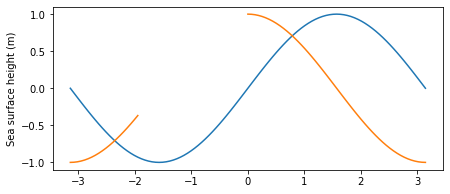

In [157]:
import base64
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(width, height))
ax = df.plot(ax=ax, legend=False)
ax.set_ylabel('Sea surface height (m)')
png = 'mpld3_{}.png'.format(station)
fig.savefig(png, dpi=resolution)

encoded = base64.b64encode(open(png, 'rb').read())

In [191]:
#encoded

In [158]:
png

'mpld3_42.png'

In [235]:
def get_frame(url,width,height):
 html = """ 
        <!doctype html>
    <html>
    <iframe id="myIFrame" width="{}" height="{}" src={}""".format(width,height,url) + """ frameborder="0"></iframe>
    <script type="text/javascript">
    var resizeIFrame = function(event) {
        var loc = document.location;
        if (event.origin != loc.protocol + '//' + loc.host) return;

        var myIFrame = document.getElementById('myIFrame');
        if (myIFrame) {
            myIFrame.style.height = event.data.h + "px";
            myIFrame.style.width  = event.data.w + "px";
        }
    };
    if (window.addEventListener) {
        window.addEventListener("message", resizeIFrame, false);
    } else if (window.attachEvent) {
        window.attachEvent("onmessage", resizeIFrame);
    }
    </script>
    </html>"""

 popup = get_frame(url,
                  width,
                  height)

 marker = folium.CircleMarker([lat,lon],
                             radius=radius,
                             color='#3186cc',
                             fill_color = '#3186cc',
                             popup=popup)

 marker.add_to(map)



 iframe = folium.element.IFrame(html=html,width=width,height=height)
 popup = folium.Popup(iframe,max_width=width)
 return popup

In [238]:
m = folium.Map(location=[lat, lon], zoom_start=5)

In [244]:
from folium import IFrame

popup = get_frame('https://www.gedenktafeln-in-berlin.de',200,200)

icon = folium.Icon(color="red", icon="ok")
folium.Marker(location=[15, 12], popup=popup, icon=icon).add_to(m)


RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
m

In [9]:
MyMap = folium.Map(location=[51.7831, -1.3065], tiles='OpenStreetMap', zoom_start=10, max_zoom=19, control_scale=True)

# Save the map
MyMap.save('MyMap.html')